<a href="https://colab.research.google.com/github/ShaliniaArun/Traffic-Sign-Classification/blob/master/TrafficSignClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Traffic sign detection is one of the major task in self-driving as it gives the input of what sign is in the image to decision making.**![alt text](https://static.designandreuse.com/news_img17/20170103b_2.jpg)





In this project, **Python and TensorFlow**  are used to classify traffic signs.

**Dataset used**: **German Traffic Sign Dataset**. This dataset has more than 50,000 images of 43 classes.

In [0]:
import pickle
import cv2
import numpy as np
import csv
import math
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


**Step 1:** **Load The Data **

Data provided in  training, validation, and testing dataset in **pickle format**. Each **dataset contains number of images and it’s label**. 

**The pickled data is a dictionary with 4 key/value pairs:**

* '**features**' is a 4D array containing raw** pixel data of the traffic sign images.**

* **'labels**' is a 1D array containing the **label/class id of the traffic sign**. 


In [0]:
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
all_labels = []

#Select workbook
with open('SignName.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)

    for row in readCSV:
        all_labels += [row[1]]

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(all_labels))

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


The file **signnames.csv** contains-
**classid -> signname **  mappings for each id.

* '**sizes**' is a list containing tuples, **(width, height)** representing the original width and height the image.

* **'coords**' is a list containing tuples, (**x1, y1, x2, y2**) representing coordinates of a bounding box around the sign in the image. 



In [9]:
sign_names = pd.read_csv('SignName.csv')
sign_names


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


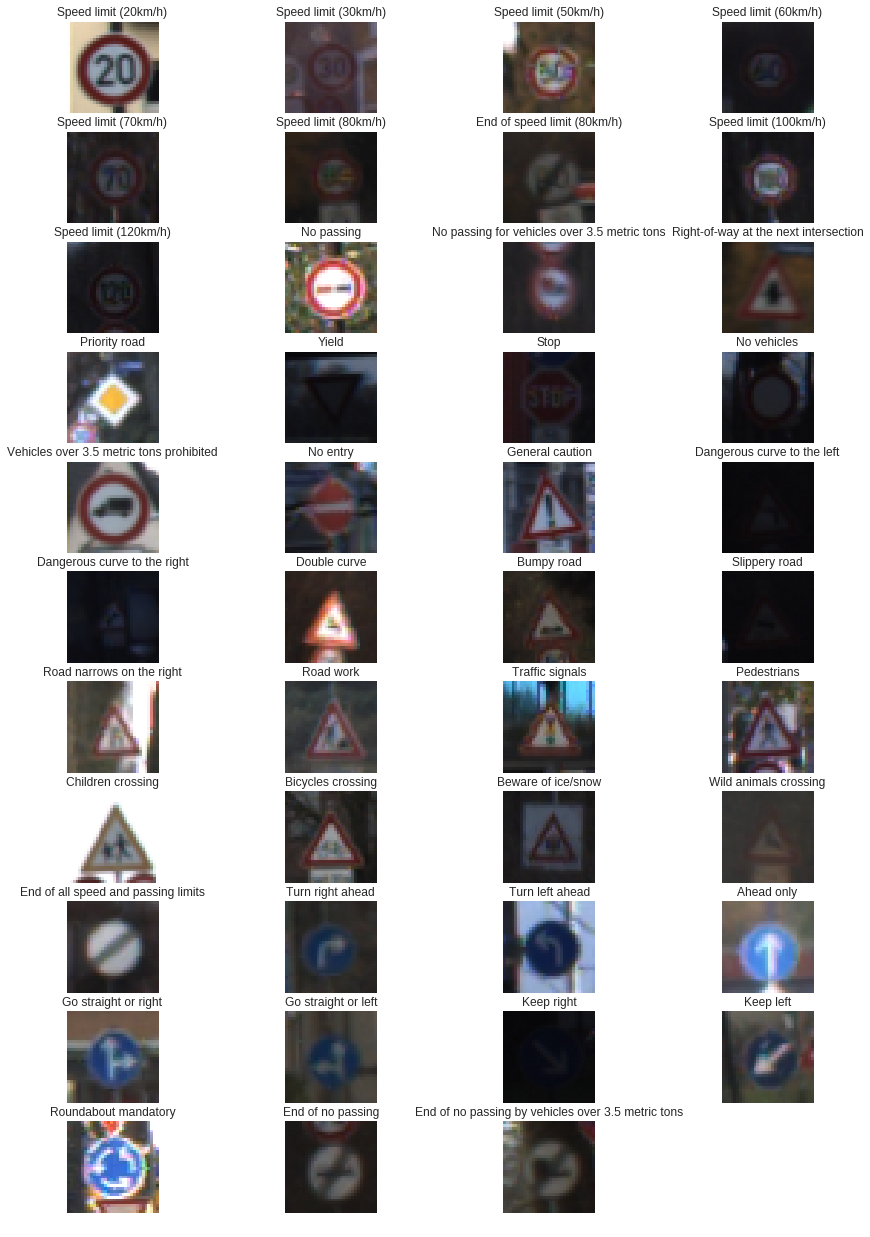

In [10]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(15, 30))
for i in range(0, n_classes):
    plt.subplot(15, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

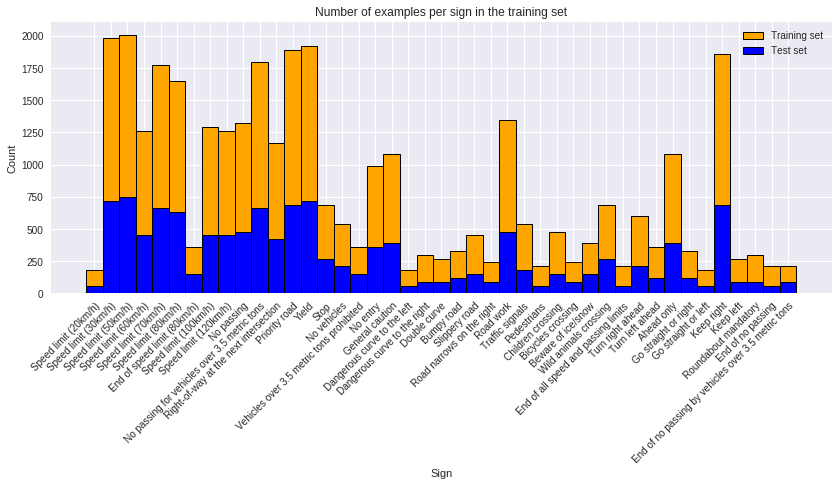

In [11]:
# Plot distribution of traffic signs in training and test sets
import numpy as np

signs = sign_names['SignName'].tolist()

plt.figure(figsize=(14, 5))   # create a figure object and  the figsize argument the width and height of the figure in inches.

plt.hist(y_train, bins=np.arange(n_classes+1)-0.5, color='orange', edgecolor='black', linewidth=1)
plt.hist(y_test, bins=np.arange(n_classes+1)-0.5, color='blue', edgecolor='black', linewidth=1)
         
plt.xticks(range(n_classes), signs, rotation=45, rotation_mode="anchor", ha="right")
plt.title('Number of examples per sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.legend(['Training set', 'Test set'])
plt.show()

In [0]:
def list_images(dataset, dataset_y, ylabel="", cmap=None):
    
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(signs[dataset_y[indx]])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
  

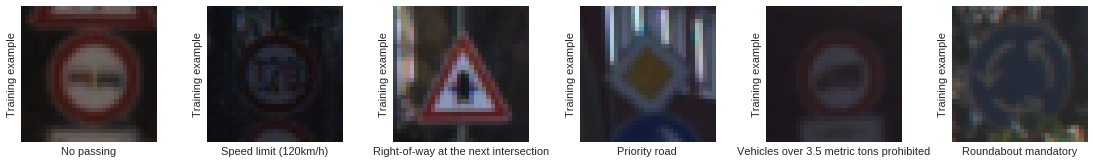

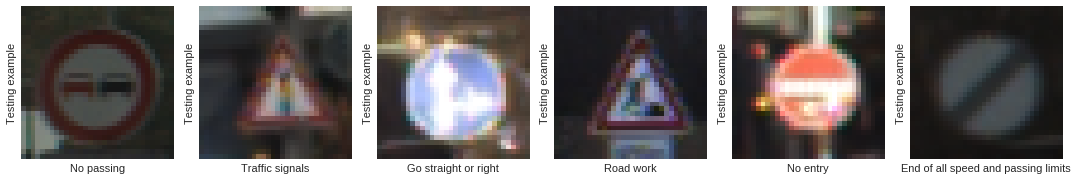

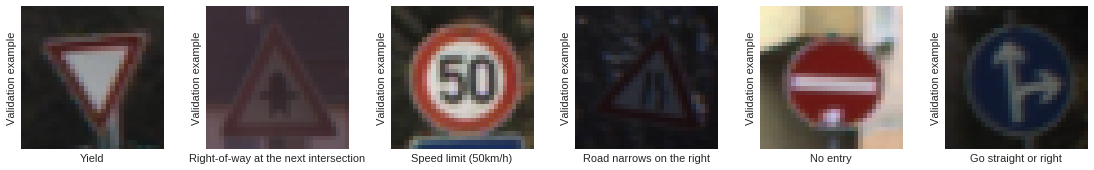

In [13]:
# Plotting traffic sign
list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")
list_images(X_valid, y_valid, "Validation example")

**Step 2: Data Preprocessing**
In this step, Several preprocessing steps to the input images **to achieve the best possible results.**

The following **preprocessing techniques** are:

* Shuffling.
* Grayscaling.
* Local Histogram Equalization.
* Normalization.



1.** Shuffling: ** In general, shuffle the training data to increase randomness and variety in training dataset, **in order for the model to be more stable**.

**sklearn** is used  to shuffle  data.

In [0]:
from sklearn.utils import shuffle

In [0]:
X_train, y_train = shuffle(X_train, y_train)

2. **Grayscaling**:  OpenCV  is used to convert the training images into grey scale.

In [0]:
def gray_scale(image):
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

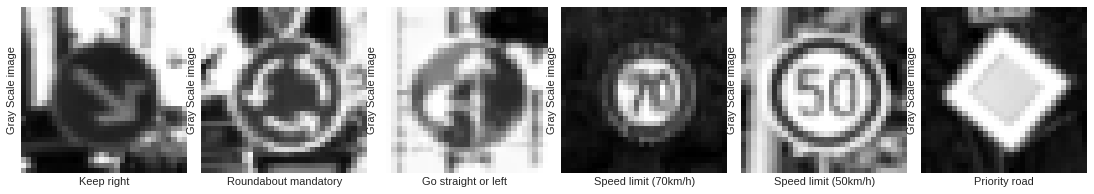

In [17]:
# Sample images after greyscaling
gray_images = list(map(gray_scale, X_train))
list_images(gray_images, y_train, "Gray Scale image", "gray")

3. **Local Histogram Equalization: ** This technique simply spreads out the **most frequent intensity values in an image**,  Applying this technique will be very helpfull in the dataset  has real world images, and **many of them has low contrast**. 

     **skimage**  is used to apply local histogram equalization to the training images.

In [0]:
def local_histo_equalize(image):
  # image: A grayscale image.
    
    kernel = morp.disk(30)
    img_local = rank.equalize(image, selem=kernel)
    return img_local

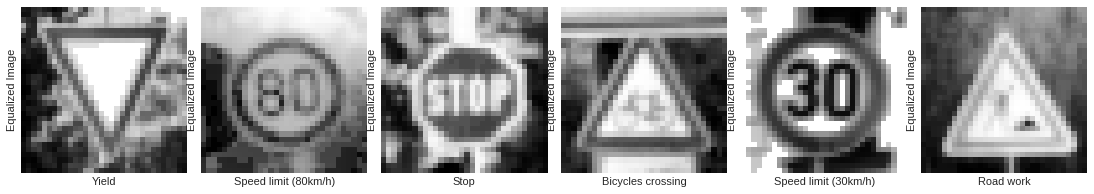

In [19]:
# Sample images after Local Histogram Equalization
equalized_images = list(map(local_histo_equalize, gray_images))
list_images(equalized_images, y_train, "Equalized Image", "gray")

4. **Normalization**: Normalization is a process that **changes the range of pixel intensity values.** 

In [0]:
def image_normalize(image):
    
# image: An np.array compatible with plt.imshow.
   
    image = np.divide(image, 255)
    return image

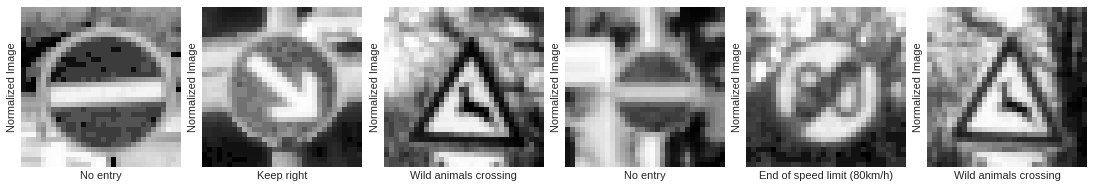

In [22]:
# Sample images after normalization
n_training = X_train.shape
normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
for i, img in enumerate(equalized_images):
    normalized_images[i] = image_normalize(img)
list_images(normalized_images, y_train, "Normalized Image", "gray")
normalized_images = normalized_images[..., None]

To **generate additional training image**,** transform_image function used**, which incluides image Rotation, Sharing, and image Translations.

In [0]:
def blur(image):
    
    return cv2.medianBlur(image,5)

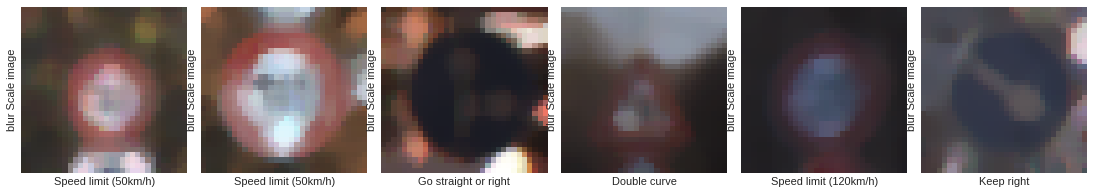

In [24]:
# Sample images after greyscaling
blur_images = list(map(blur, X_train))
list_images(blur_images, y_train, "blur Scale image", "gray")

In [0]:
def bilateral(image):
  return cv2.bilateralFilter(image,9,75,75)


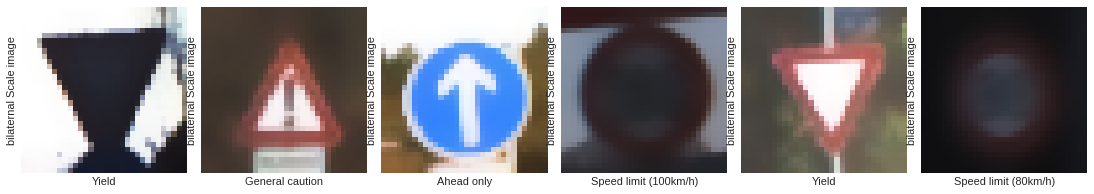

In [26]:
# Sample images after greyscaling
bilateral_images = list(map(bilateral, X_train))
list_images(bilateral_images, y_train, "bilaternal Scale image", "gray")

In [27]:
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

print('Success: transform_image function loaded.')

Success: transform_image function loaded.


Image data shape = (32, 32, 3)


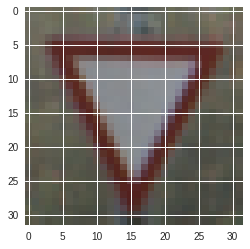

In [30]:
# Example image Without transformation
image_num=2000
image = X_train[image_num,:,:,:]
image = transform_image(image,0,0,0)
plt.imshow(image)
print("Image data shape =", image_shape)

Image data shape = (32, 32, 3)


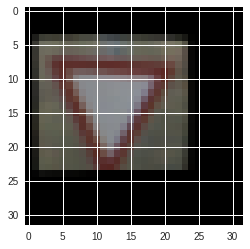

In [31]:
# Example image with transformation
image_num=2000
image = X_train[image_num,:,:,:]
image = transform_image(image,10,10,10)
plt.imshow(image)
print("Image data shape =", image_shape)

In [32]:
import os

pickle_file = 'transformed_data_2.pickle'

if not os.path.isfile(pickle_file):
  print('Saving data to pickle file...')
try:
    with open('transformed_data_2.pickle', 'wb') as pfile:
      pickle.dump(
            {
                'X_train': X_train,
                'y_train': y_train,
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
  print('Data cached in pickle file.')

Saving data to pickle file...


In [33]:
# Reload the data
pickle_file = 'transformed_data_2.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['X_train']
    y_train = pickle_data['y_train']
    #del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


In [34]:
print ("Number of training examples after image augument =",len(X_train))
print ("Number of testing examples after image augument =",len(X_test))
print ("Number of training labels after image augument =",len(y_train))
print ("Number of testing labels after image augument =",len(y_test))

Number of training examples after image augument = 34799
Number of testing examples after image augument = 12630
Number of training labels after image augument = 34799
Number of testing labels after image augument = 12630


In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [36]:
print ("Number of training examples after data split =",len(X_train))
print ("Number of testing examples after data split =",len(X_test))
print ("Number of validation examples after data split =",len(X_valid))
print ("Number of training labels after data split =",len(y_train))
print ("Number of testing labels after data split =",len(y_test))
print ("Number of validation labels after data split =",len(y_valid))

Number of training examples after data split = 27839
Number of testing examples after data split = 12630
Number of validation examples after data split = 6960
Number of training labels after data split = 27839
Number of testing labels after data split = 12630
Number of validation labels after data split = 6960


In [0]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def pre_process_image(image):

    image_gray = np.mean(image, axis=3)
    image_gray = np.expand_dims(image_gray, axis=3)
    image_norm = (image_gray - image_gray.mean())/image_gray.std()
    
    return image_norm

In [0]:
X_train = pre_process_image(X_train) 
X_valid = pre_process_image(X_valid) 
X_test = pre_process_image(X_test)

Image data shape = (32, 32, 1)


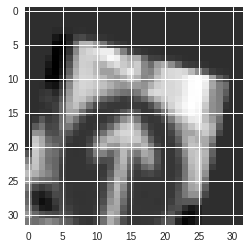

In [44]:
# Example transformation
image_num=1700
image = X_train[image_num,:,:,:]
image = transform_image(image,10,10,10)
plt.imshow(image, cmap='gray')
print("Image data shape =", X_train[image_num].shape)

In [0]:
import tensorflow as tf

EPOCHS = 70
BATCH_SIZE = 100

In [46]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1,name='convolution0')
    
    conv1 = tf.nn.dropout(conv1, keep_prob2)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name='convolution2')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution3')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Dropout_01    
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout_02
    fc2 = tf.nn.dropout(fc2, keep_prob)


    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma, name='weights'))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('done')

done


In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [49]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, keep_prob2:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_figure = []

    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6, keep_prob2:0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Traffic')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.719

EPOCH 2 ...
Validation Accuracy = 0.878

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.928

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.958

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.966

EPOCH 10 ...
Validation Accuracy = 0.966

EPOCH 11 ...
Validation Accuracy = 0.973

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.976

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.979

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.984

EPOCH 18 ...
Validation Accuracy = 0.984

EPOCH 19 ...
Validation Accuracy = 0.985

EPOCH 20 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.986

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

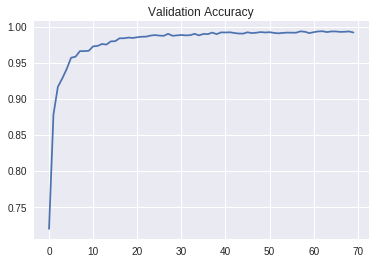

In [52]:
plt.plot(validation_accuracy_figure)
plt.title("Validation Accuracy")
plt.show()

In [53]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Traffic
Train Accuracy = 0.999
Valid Accuracy = 0.992
Test Accuracy = 0.941


IndexError: ignored

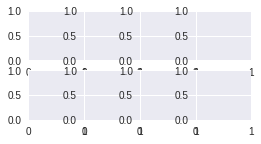

In [54]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./test-traffic-signs/*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image) 

my_images_normalized=pre_process_image(my_images)
print(my_images_normalized.shape)